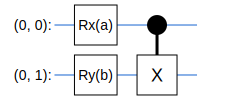

In [9]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

a, b = sympy.symbols('a b')

# Create two qubits
q0, q1 = cirq.GridQubit.rect(1, 2)

# Create a circuit on these qubits using the parameters you created above.
circuit = cirq.Circuit(
    cirq.rx(a).on(q0),
    cirq.ry(b).on(q1),
    cirq.CNOT(control=q0, target=q1))

SVGCircuit(circuit)

0: ───H───@───────@───────@───────@───────@───────@───────@───────@───X───@───────@───────@───────@───────@───────@───────@───────@───
          │       │       │       │       │       │       │       │       │       │       │       │       │       │       │       │
1: ───H───@───────@───────@───────@───X───@───────@───────@───────@───X───@───────@───────@───────@───X───@───────@───────@───────@───
          │       │       │       │       │       │       │       │       │       │       │       │       │       │       │       │
2: ───H───@───────@───X───@───────@───X───@───────@───X───@───────@───X───@───────@───X───@───────@───X───@───────@───X───@───────@───
          │       │       │       │       │       │       │       │       │       │       │       │       │       │       │       │
3: ───H───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───X───@───
          │       │       │       │       │       │       │     

/Users/alimohsen/.conda/envs/CS229/lib/python3.7/site-packages/ipykernel_launcher.py:78: ComplexWarning: Casting complex values to real discards the imaginary part


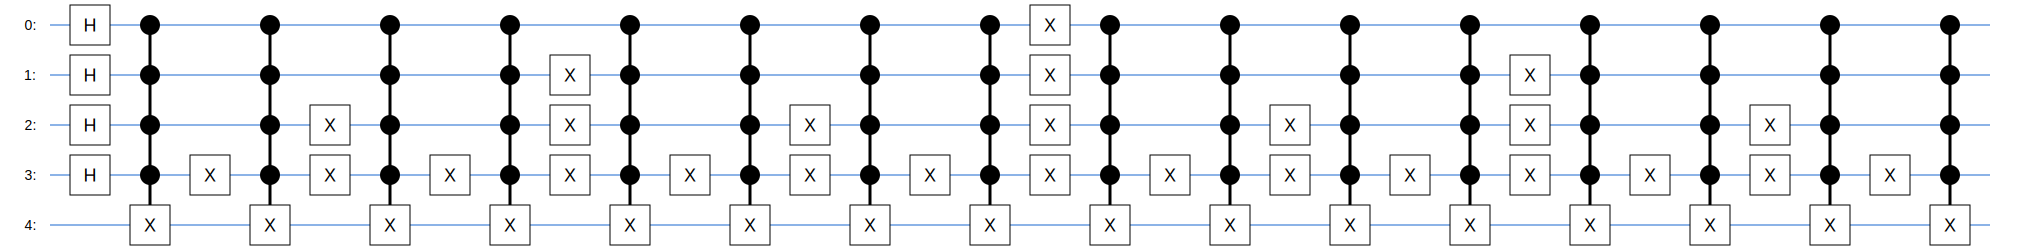

In [10]:
from cirq import Simulator
N_QUBITS = 4

gate = cirq.X.controlled(N_QUBITS)

def generate_circuit_from_image(qubits, image=np.zeros(2**N_QUBITS)):
    for qubit in qubits[:-1]:
        yield cirq.H(qubit)

    (yield gate(*qubits)) if image[0] == 1 else None
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[1] == 1 else None
    yield cirq.X(qubits[2])
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[2] == 1 else None
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[3] == 1 else None
    yield cirq.X(qubits[1])
    yield cirq.X(qubits[2])
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[4] == 1 else None
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[5] == 1 else None
    yield cirq.X(qubits[2])
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[6] == 1 else None
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[7] == 1 else None
    yield cirq.X(qubits[0])
    yield cirq.X(qubits[1])
    yield cirq.X(qubits[2])
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[8] == 1 else None
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[9] == 1 else None
    yield cirq.X(qubits[2])
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[10] == 1 else None
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[11] == 1 else None
    yield cirq.X(qubits[1])
    yield cirq.X(qubits[2])
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[12] == 1 else None
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[13] == 1 else None
    yield cirq.X(qubits[2])
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[14] == 1 else None
    yield cirq.X(qubits[3])

    (yield gate(*qubits)) if image[15] == 1 else None


def circuit_from_image(image):
    pass
qubits = [cirq.LineQubit(i) for i in range(N_QUBITS+1)]
circuit = cirq.Circuit()
circuit.append(generate_circuit_from_image(qubits, np.array([1] * (2**N_QUBITS))))
print(circuit)
simulator = Simulator()
result=simulator.simulate(circuit, qubit_order=qubits, initial_state=0)
out_state = result.final_state_vector
out_state_rep = 4*np.abs(np.around(out_state.astype(np.float),3))
print(out_state_rep)
for i in range(0, len(out_state_rep), 2):
    print('{} x ({},{})'.format(format(i//2, '0{}b'.format(N_QUBITS)), int(out_state_rep[i]), int(out_state_rep[i + 1])))
SVGCircuit(circuit)



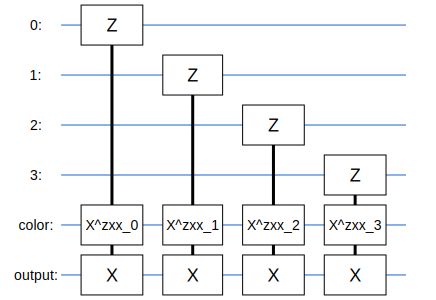

In [2]:
from gates import CircuitLayerBuilder
from config import N_QUBITS
import cirq
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
demo_builder = CircuitLayerBuilder(pixel_qubits = [cirq.LineQubit(i) for i in range(N_QUBITS)],
                                   color_qubit=cirq.NamedQubit('color'),
                                   output_qubit=cirq.NamedQubit('output'))

circuit = cirq.Circuit()
demo_builder.add_3q_layer(circuit, gate_name='ZXX')
SVGCircuit(circuit)